In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Load your data into a pandas DataFrame
# Assuming your DataFrame is named 'df' and contains features and continuous target variable

# Example data (replace this with your actual data loading code)

df = pd.read_excel('manufacturing_final.xlsx')
print(df.head())
df=df.dropna()
# Define features and target variable
X, y = df.drop('Manufacturing output', axis=1), df[['Manufacturing output']]
print(X.head())

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regression



   Unskilled Labor (Average ₹/month)  Skilled Labor (Average ₹/month)  Year  \
0                               2250                             3750  2000   
1                               2400                             3900  2001   
2                               2550                             4050  2002   
3                               2700                             4200  2003   
4                               2850                             4500  2004   

   Value of Exports (USD billions)  Value of Imports (USD billions)  \
0                             44.6                             52.1   
1                             44.2                             52.8   
2                             43.9                             56.7   
3                             53.5                             71.8   
4                             61.7                             98.5   

   Population (millions) (Adjusted)  Saving Rate (% of GDP)  Repo Rate  \
0                       

Mean Squared Error: 121.26882635534244
R-squared Score: 0.9919109791802773
year original predicted based on previous data
2000 70     [67.67108061]
2001 74     [62.20446591]
2002 80     [73.44097899]
2003 94     [103.80273464]
2004 112     [127.48059799]
2005 131     [142.94887555]
2006 162     [163.04155742]
2007 205     [195.15737754]
2008 205     [215.30553784]
2009 230     [229.67950903]
2010 285     [264.33192832]
2011 294     [277.57291568]
2012 289     [288.21408761]
2013 283     [301.65548893]
2014 307     [312.63500586]
2015 327     [327.36514997]
2016 347     [350.53314335]
2017 398     [393.19001914]
2018 402     [403.46023982]
2019 381     [383.10006389]
2020 377     [368.41283931]
2021 455     [436.87515679]
2022 450     [469.92124582]
[7.39525949]


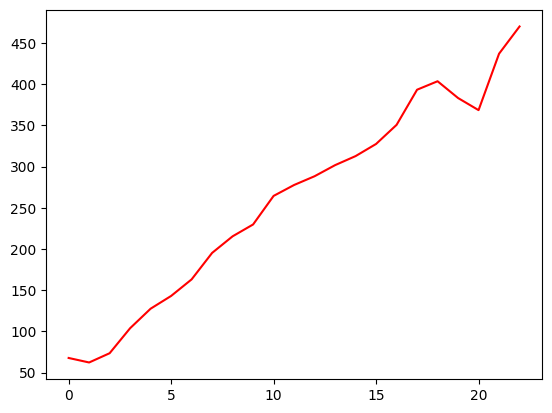

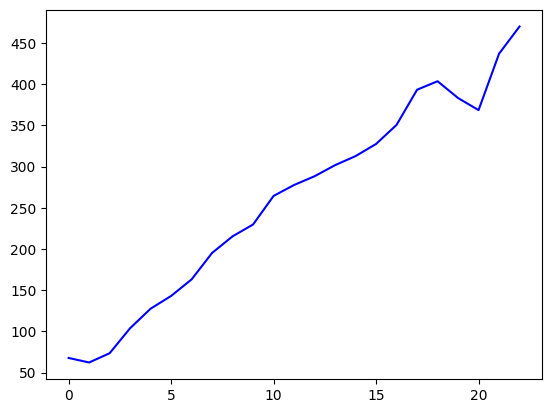

In [2]:
degree = 1  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X)
X_test_poly = poly_features.transform(X)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_poly, y)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

list_given=y['Manufacturing output']
avg=0
print('year' , 'original' , 'predicted based on previous data')
for el in range(len(list_given)):
    print(2000+el,list_given[el], "   ", y_pred[el])
    avg+=(list_given[el]-y_pred[el])**2
print((avg/51)**(1/2))

plt.plot(y_pred,color='red')
plt.show()
plt.plot(y_pred,color='blue')
plt.show()
